In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
titanic_data = pd.read_csv('datasets/Titanic.csv')

In [27]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
titanic_data = titanic_data[["Survived", "Pclass", "Sex", "Age", "Embarked"]]
titanic_data = titanic_data.dropna()
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1})
titanic_data["Embarked"] = titanic_data["Embarked"].map({"C":0, "Q":1, "S":2})

In [29]:
titanic_data

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [30]:
X = titanic_data[["Pclass", "Sex", "Age","Embarked"]]
y = titanic_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h3>TESTING OF ACCURACY LEVEL</h3>

In [31]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8041958041958042


<h3>When the level of accuracy hits 0.6 and above, it means that the model is picking up patterns it is now Learning!</h3>

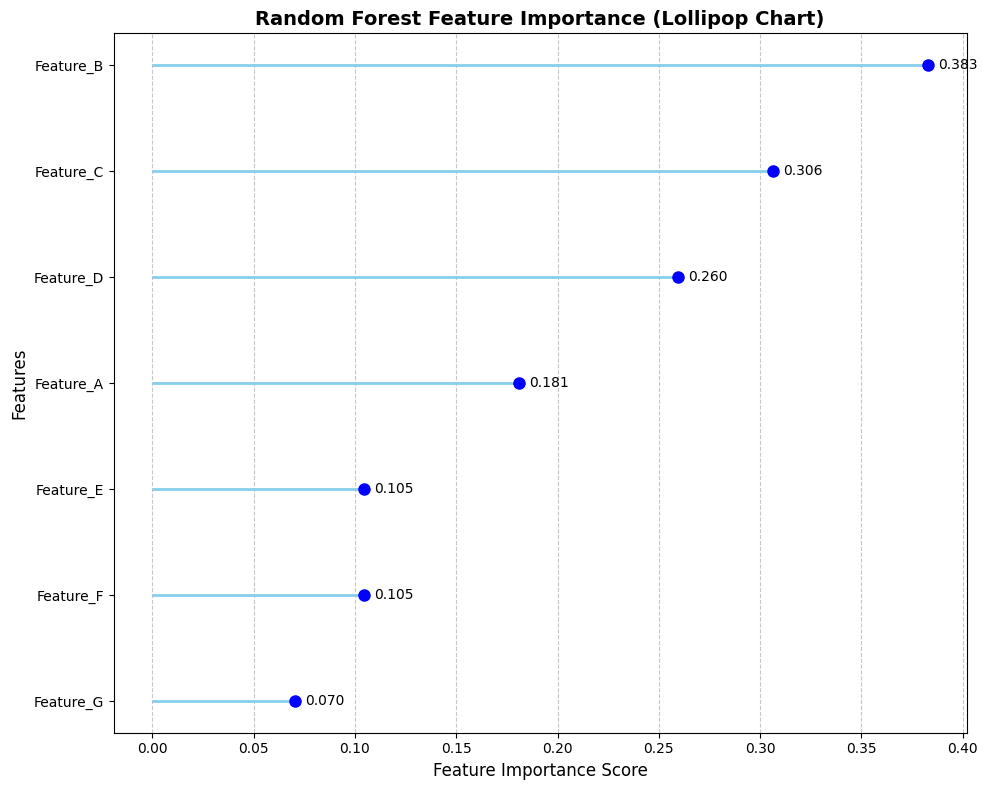

In [32]:
np.random.seed(42)
features_list = ['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E', 'Feature_F', 'Feature_G']
importances_list = np.random.rand(len(features_list)) * 0.35 + 0.05 # Create varying importance scores
importance_df = pd.DataFrame({
    'features': features_list,
    'importances': importances_list
})

importance_df = importance_df.sort_values(by='importances', ascending=True)
features = importance_df['features']
importances = importance_df['importances']

plt.figure(figsize=(10, 8))
plt.hlines(y=features, xmin=0, xmax=importances, color='skyblue', linewidth=2)
plt.plot(importances, features, 'o', color='blue', markersize=8)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Random Forest Feature Importance (Lollipop Chart)", fontsize=14, weight='bold')

for i, (feature, importance) in enumerate(zip(features, importances)):
    plt.text(importance + 0.005, feature, f'{importance:.3f}', ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

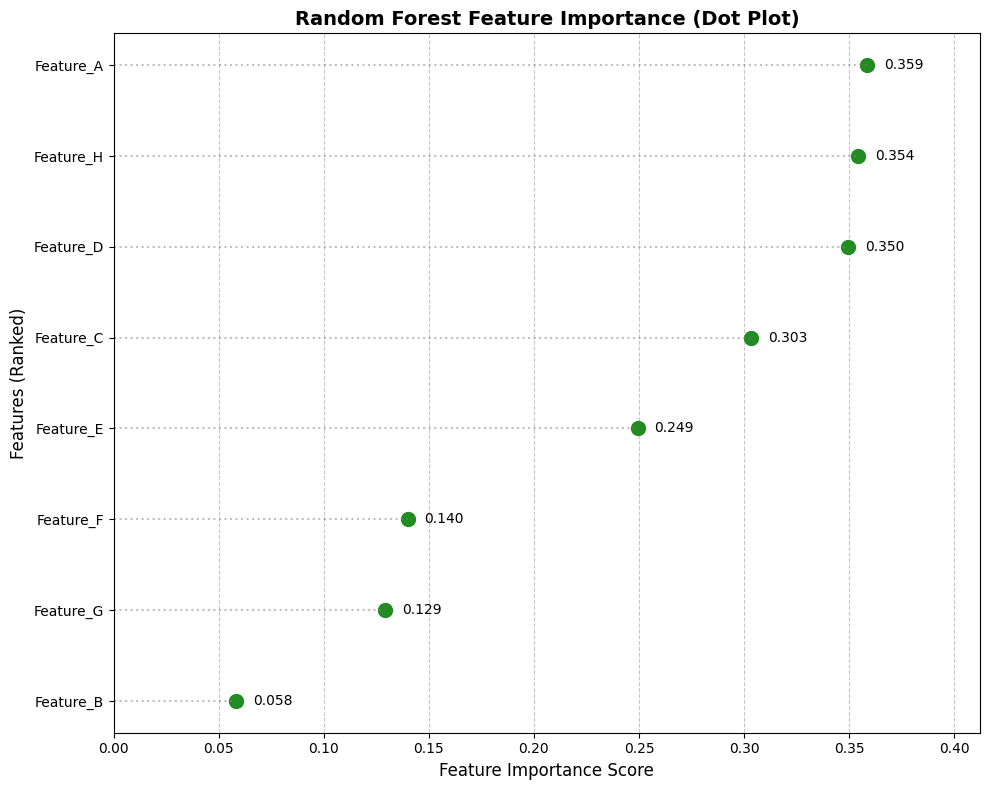

In [33]:
np.random.seed(10)
features_list = ['Feature_A', 'Feature_B', 'Feature_C', 'Feature_D', 'Feature_E', 'Feature_F', 'Feature_G', 'Feature_H']
importances_list = np.random.rand(len(features_list)) * 0.4 + 0.05 # Create varying importance scores
importance_df = pd.DataFrame({
    'features': features_list,
    'importances': importances_list
})

importance_df = importance_df.sort_values(by='importances', ascending=True)
features = importance_df['features']
importances = importance_df['importances']

plt.figure(figsize=(10, 8))
plt.plot(importances, features, 'o', color='forestgreen', markersize=10)
plt.hlines(y=features, xmin=0, xmax=importances, color='gray', linestyle=':', alpha=0.5)

for i, (feature, importance) in enumerate(zip(features, importances)):
    plt.text(importance + 0.008, feature, f'{importance:.3f}', ha='left', va='center', fontsize=10)

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features (Ranked)", fontsize=12)
plt.title("Random Forest Feature Importance (Dot Plot)", fontsize=14, weight='bold')
plt.xlim(0, max(importances) * 1.15)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

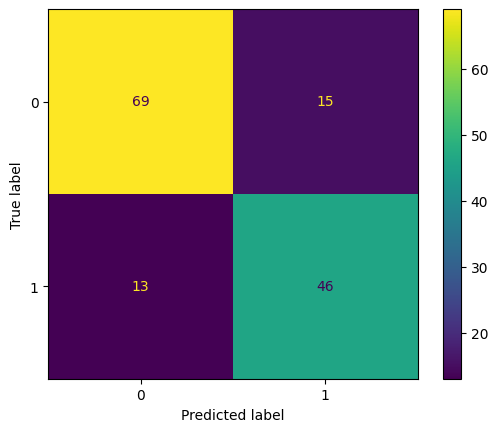

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h3>INSIGHT: The confusion matrix highlights where the model performs strongly and where it struggles. High values along the diagonal show classes that the model predicts accurately, indicating reliable performance and making those predictions suitable for automated or high-confidence decision-making.</h3>

<h3>PRACTICAL APPLICATION</h3>

<li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h3>MANUAL TESTING</h3>

In [35]:
model.predict([[1, 2, 60, 0]])

array([1])

In [36]:
if model.predict([[0, 5, 1,2]]) == [1]:
    print("PASSENGER SURVIVED")
elif model.predict([[0, 5, 1, 2]]) == [0]:
    print("PASSENGER UNLIKELY TO SURVIDED")
else:
    print("INVALID")

PASSENGER UNLIKELY TO SURVIDED
